# STRATIFIED CLUSTERING OF BLOOD DONATION DATA

### Step 1: Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore") 
# %matplotlib inline

In [19]:
# using the sample data available in repo
df = pd.read_csv('test_control_data.csv')
df.head()

,Cost Center,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing
0,650281,34555.408,45791.82610,6508322.21,7096722.134,A,A,158.917957,154.960440,96.06,1.79,14.01,1.30,67,93.55,0.245380,0.090407,NoBorder,Regular
1,6502O3,46883.381,56782.43670,9121215.53,8442199.812,A,A,163.605417,148.470316,93.61,3.50,11.87,0.28,83,90.90,0.174333,-0.074444,NoBorder,Acquisition
2,6502O6,37150.013,40953.89088,7500077.72,6552098.632,A,B,167.522278,159.651269,90.83,4.31,16.70,-0.03,74,88.02,0.092882,-0.126396,NoBorder,Acquisition
3,6502I4,31871.450,42252.66128,6448167.14,6615439.751,A,A,173.118202,156.464240,93.40,4.12,21.97,0.22,74,92.03,0.245694,0.025941,NoBorder,Regular
4,6502AZ,49053.847,53874.01009,10314454.59,8107861.383,A,A,178.922599,150.467293,92.98,3.86,17.24,0.34,87,91.45,0.089471,-0.213932,NoBorder,Regular


In [23]:
df.isna().sum()

Cost Center                                              0
 Collections                                             0
2023 Collections                                         0
 Total Cost                                              0
2023 Total Cost                                          0
2022 Total CPL Score                                     0
2023 Total CPL Score                                     0
 CPL - Total 2022 YTD                                    0
2023 CPL Total                                           0
2022 Have Internet Access at Home: Percent               0
2022 Unemployed Population 16+: Percent                  0
2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent    0
2022-2027 Growth Rate: Population                        0
2022 Per Capita Income: Index                            0
2022 Have a Smartphone: Percent                          0
Collection_growth_perc                                   0
Total_cost_perc                                         

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical_columns=list(df.select_dtypes(include=numerics).columns)
Categorical_columns=list(df.select_dtypes('object').columns)

Categorical_columns

['Cost Center',
 '2022 Total CPL Score',
 '2023 Total CPL Score',
 'Border',
 'Timing']

### Step 2: Treating missing values

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical_columns=list(df.select_dtypes(include=numerics).columns)
Categorical_columns=list(df.select_dtypes('object').columns)

for i in Numerical_columns:
    df[i]=df[i].fillna(0)
    
for i in Categorical_columns:
    df[i]=df[i].fillna("Unknown")
    
df_center=df[["Cost Center"]]
df.drop("Cost Center",inplace=True,axis=1)

In [27]:
df.head()

,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing
0,34555.408,45791.82610,6508322.21,7096722.134,A,A,158.917957,154.960440,96.06,1.79,14.01,1.30,67,93.55,0.245380,0.090407,NoBorder,Regular
1,46883.381,56782.43670,9121215.53,8442199.812,A,A,163.605417,148.470316,93.61,3.50,11.87,0.28,83,90.90,0.174333,-0.074444,NoBorder,Acquisition
2,37150.013,40953.89088,7500077.72,6552098.632,A,B,167.522278,159.651269,90.83,4.31,16.70,-0.03,74,88.02,0.092882,-0.126396,NoBorder,Acquisition
3,31871.450,42252.66128,6448167.14,6615439.751,A,A,173.118202,156.464240,93.40,4.12,21.97,0.22,74,92.03,0.245694,0.025941,NoBorder,Regular
4,49053.847,53874.01009,10314454.59,8107861.383,A,A,178.922599,150.467293,92.98,3.86,17.24,0.34,87,91.45,0.089471,-0.213932,NoBorder,Regular


### Step 3: Converting categorical variables to numerical

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [29]:
# Fetching out the numerical and categorical columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical_columns=list(df.select_dtypes(include=numerics).columns)
Categorical_columns=list(df.select_dtypes('object').columns)

df_transform=MultiColumnLabelEncoder(columns = Categorical_columns).fit_transform(df)

In [30]:
df_transform.head()

,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing
0,34555.408,45791.82610,6508322.21,7096722.134,0,0,158.917957,154.960440,96.06,1.79,14.01,1.30,67,93.55,0.245380,0.090407,1,2
1,46883.381,56782.43670,9121215.53,8442199.812,0,0,163.605417,148.470316,93.61,3.50,11.87,0.28,83,90.90,0.174333,-0.074444,1,0
2,37150.013,40953.89088,7500077.72,6552098.632,0,1,167.522278,159.651269,90.83,4.31,16.70,-0.03,74,88.02,0.092882,-0.126396,1,0
3,31871.450,42252.66128,6448167.14,6615439.751,0,0,173.118202,156.464240,93.40,4.12,21.97,0.22,74,92.03,0.245694,0.025941,1,2
4,49053.847,53874.01009,10314454.59,8107861.383,0,0,178.922599,150.467293,92.98,3.86,17.24,0.34,87,91.45,0.089471,-0.213932,1,2


### Step 4: Normalizing the data points and running K-Means to find the best elbow point

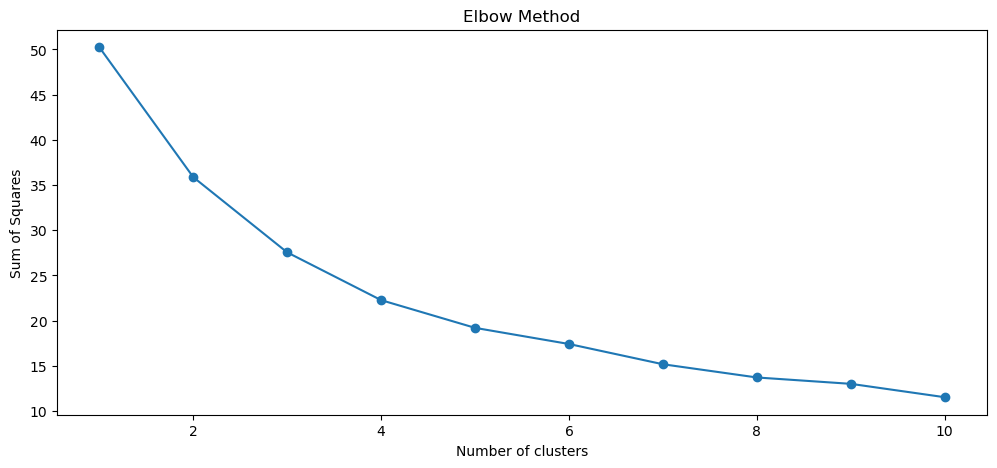

In [31]:
std=MinMaxScaler()
arr1=std.fit_transform(df_transform)

SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 99)
    kmeans.fit(arr1)
    SSE.append(kmeans.inertia_)
  

plt.figure(figsize=(12,5))
plt.plot(range(1, 11), SSE,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares')
plt.show()

In [32]:
kmeans_cluster = KMeans(n_clusters = 3, random_state = 23)
result_cluster=kmeans_cluster.fit_predict(arr1)

df['clusters']=result_cluster
df['clusters'].value_counts()

1    26
2    20
0     5
Name: clusters, dtype: int64

In [33]:
df_final_cluster=pd.concat([df_center,df],axis=1)

# Joining to create the final Dataset
df_final_cluster

,Cost Center,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing,clusters
0,650281,34555.408,45791.82610,6508322.21,7.096722e+06,A,A,158.917957,154.960440,96.06,1.79,14.01,1.30,67,93.55,0.245380,0.090407,NoBorder,Regular,1
1,6502O3,46883.381,56782.43670,9121215.53,8.442200e+06,A,A,163.605417,148.470316,93.61,3.50,11.87,0.28,83,90.90,0.174333,-0.074444,NoBorder,Acquisition,1
2,6502O6,37150.013,40953.89088,7500077.72,6.552099e+06,A,B,167.522278,159.651269,90.83,4.31,16.70,-0.03,74,88.02,0.092882,-0.126396,NoBorder,Acquisition,2
3,6502I4,31871.450,42252.66128,6448167.14,6.615440e+06,A,A,173.118202,156.464240,93.40,4.12,21.97,0.22,74,92.03,0.245694,0.025941,NoBorder,Regular,1
4,6502AZ,49053.847,53874.01009,10314454.59,8.107861e+06,A,A,178.922599,150.467293,92.98,3.86,17.24,0.34,87,91.45,0.089471,-0.213932,NoBorder,Regular,1
5,6502F5,35413.251,54391.51202,7793050.80,8.585819e+06,B,A,182.498165,157.735388,94.16,3.55,12.06,0.62,89,91.56,0.348920,0.101728,NoBorder,Regular,1
6,6502BQ,35754.224,41570.81006,7756445.34,6.831192e+06,B,B,182.634214,164.169830,95.09,2.39,8.10,1.24,98,92.35,0.139920,-0.119288,NoBorder,Regular,1
7,6502G5,34695.823,45276.09172,7600574.70,7.322285e+06,B,B,183.820204,161.711716,95.90,3.41,9.63,0.54,106,92.44,0.233683,-0.036614,NoBorder,Regular,1
8,6502G7,50196.758,46199.18084,11119738.02,8.210257e+06,B,D,184.466748,177.525391,93.61,8.02,16.83,-0.39,71,92.40,-0.086529,-0.261650,NoBorder,Regular,1
9,6502T8,29246.879,44678.83562,6454906.21,7.375920e+06,B,B,184.815357,164.914430,93.18,3.73,14.69,0.08,77,89.83,0.345397,0.142684,NoBorder,Regular,1


In [49]:
df_final_cluster.to_csv("test_control_final.csv",index=False)

In [34]:
df_cluster_0=df_final_cluster[df_final_cluster['clusters']==0]
df_cluster_1=df_final_cluster[df_final_cluster['clusters']==1]
df_cluster_2=df_final_cluster[df_final_cluster['clusters']==2]

In [42]:
print(df_cluster_2.shape)
print(df_cluster_1.shape)
print(df_cluster_0.shape)


(20, 20)
(26, 20)
(5, 20)


In [ ]:
### Step 5: Pick data points from each cluster to create sample space

In [46]:
df_cluster_1.sample(2)

,Cost Center,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing,clusters
38,650283,45649.170,60168.07436,7734602.13,8307216.966,A,A,146.389621,137.846283,95.32,1.91,16.57,1.02,58,92.78,0.241306,0.074033,NoBorder,Regular,1
40,C30205,51733.029,63678.37556,10209658.24,9489830.842,A,A,164.686463,149.097441,94.94,4.02,12.40,0.59,65,93.84,0.187589,-0.070505,NoBorder,Regular,1


In [47]:
df_cluster_2.sample(1)

,Cost Center,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing,clusters
33,6502K2,12260.253,21574.17758,4443259.79,4464709.112,F,F,299.03062,206.261126,95.11,3.32,8.16,0.4,102,91.44,0.431716,0.004827,NoBorder,New,2


In [48]:
df_cluster_0.sample(1)

,Cost Center,Collections,2023 Collections,Total Cost,2023 Total Cost,2022 Total CPL Score,2023 Total CPL Score,CPL - Total 2022 YTD,2023 CPL Total,2022 Have Internet Access at Home: Percent,2022 Unemployed Population 16+: Percent,2020 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent,2022-2027 Growth Rate: Population,2022 Per Capita Income: Index,2022 Have a Smartphone: Percent,Collection_growth_perc,Total_cost_perc,Border,Timing,clusters
28,6502BU,21985.182,39853.33079,5906501.09,6559038.427,F,B,222.574561,161.41206,91.79,4.95,20.49,-0.15,61,91.69,0.448348,0.110478,Border,Regular,0
